<a href="https://colab.research.google.com/github/AnnapurnaJ6/CyberbullyingDetectorDemo/blob/main/mlrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Humidity  WindSpeed  Temperature
0         85          5           22
1         80          7           23
2         75          9           25
3         70         12           27
4         65         14           28
5         60         16           29
6         55         18           30
7         50         20           31
8         45         22           32
9         40         25           33
10        90          4           21
11        88          6           22
12        84          8           23
13        78         10           25
14        72         13           27
15        68         15           28
16        63         17           29
17        57         19           30
18        52         21           31
19        47         23           32
20        42         26           33
21        95          3           20
22        92          5           21
23        87          7           22
24        81          9           24
25        76         11           26
2

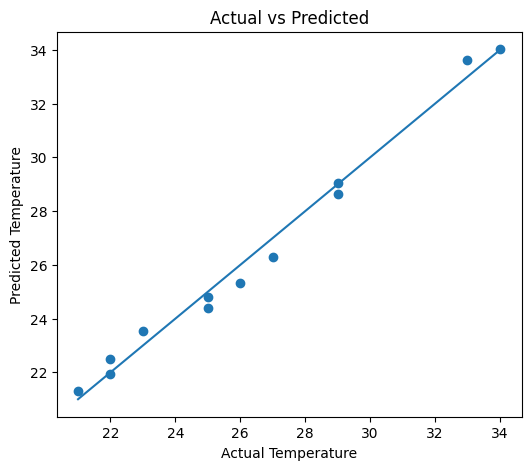

Predicted temperature for {'Humidity': 70, 'WindSpeed': 12} => 26.31122880417927


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1FfnB6upRn_RhFdTGqYnKVtTzDud5Gv6W3yObodQwPIM/edit?usp=sharing"
csv_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")
df = pd.read_csv(csv_url)
print(df.head(60))

# features and target (correct syntax)
X = df[['Humidity', 'WindSpeed']]
y = df['Temperature']

# train/test split (use random_state, not random_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train ridge model
model = Ridge()
model.fit(X_train, y_train)

# predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Coefficients (Humidity, WindSpeed):", model.coef_)
print("Intercept:", model.intercept_)

# quick plot: actual vs predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx])
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted")
plt.show()

# predict a new sample
new_sample = pd.DataFrame({'Humidity': [70], 'WindSpeed': [12]})
print("Predicted temperature for", new_sample.to_dict(orient='records')[0], "=>", model.predict(new_sample)[0])




